In [60]:
# import libraries
import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings("ignore")

from pathlib import Path

In [61]:
# Set relative path to the dataset folder
data_path = Path("01_data")

# Read CSV files from data_path
train = pd.read_csv(data_path/'train.csv')
test = pd.read_csv(data_path/'test.csv')

print(f"- train.csv: {train.shape}")
print(f"- test.csv: {test.shape}")

# Clean column names for all DataFrames: apply lower() and strip()
# Store original columns for reference
original_train_cols = train.columns.tolist()
original_test_cols = test.columns.tolist()

# Clean column names
train.columns = train.columns.str.lower().str.strip()
test.columns = test.columns.str.lower().str.strip()

- train.csv: (8990, 98)
- test.csv: (10, 99)


In [62]:
train.head()

,date_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,v3,v4,v5,v6,v7,v8,v9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [63]:
train.forward_returns.describe()

count    8990.000000
mean        0.000469
std         0.010551
min        -0.039754
25%        -0.004324
50%         0.000659
75%         0.005900
max         0.040661
Name: forward_returns, dtype: float64

In [64]:
train.risk_free_rate.describe()

count    8990.000000
mean        0.000107
std         0.000088
min        -0.000004
25%         0.000008
50%         0.000095
75%         0.000193
max         0.000317
Name: risk_free_rate, dtype: float64

In [65]:
train.market_forward_excess_returns.describe()

count    8990.000000
mean        0.000051
std         0.010568
min        -0.040582
25%        -0.004759
50%         0.000252
75%         0.005479
max         0.040551
Name: market_forward_excess_returns, dtype: float64

In [66]:
train.columns

Index(['date_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'e1',
       'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19',
       'e2', 'e20', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'i1', 'i2', 'i3',
       'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'm1', 'm10', 'm11', 'm12', 'm13',
       'm14', 'm15', 'm16', 'm17', 'm18', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'p1', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p7', 'p8', 'p9', 's1', 's10', 's11', 's12', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 'v1', 'v10', 'v11', 'v12', 'v13', 'v2',
       'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [67]:
# print(train.forward_returns.sample(3))
# print(train.forward_returns.sample(3))
# print(train.market_forward_excess_returns.sample(3))

In [68]:
"""
train.csv Historic market data. 
The coverage stretches back decades; expect to see extensive missing values early on.

date_id - An identifier for a single trading day.
M* - Market Dynamics/Technical features.
E* - Macro Economic features.
I* - Interest Rate features.
P* - Price/Valuation features.
V* - Volatility features.
S* - Sentiment features.
MOM* - Momentum features.
D* - Dummy/Binary features.

forward_returns - The returns from buying the S&P 500 and selling it a day later. Train set only.

risk_free_rate - The federal funds rate. Train set only.

market_forward_excess_returns - Forward returns relative to expectations. 
Computed by subtracting the rolling five-year mean forward returns and winsorizing 
the result using a median absolute deviation (MAD) with a criterion of 4. Train set only.
""";

In [69]:
test.head()

,date_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,v4,v5,v6,v7,v8,v9,is_scored,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,8980,0,0,0,0,1,0,0,1,0,...,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909,True,0.003541,0.000161,0.003068
1,8981,0,0,0,0,1,0,0,1,0,...,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,True,-0.005964,0.000162,-0.006437
2,8982,0,0,0,0,1,0,0,0,1,...,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,True,-0.007410,0.000160,-0.007882
3,8983,0,0,0,0,1,0,0,0,1,...,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,True,0.005420,0.000160,0.004949
4,8984,0,0,0,0,0,0,1,0,1,...,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,True,0.008357,0.000159,0.007887


In [70]:
test.columns

Index(['date_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'e1',
       'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19',
       'e2', 'e20', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'i1', 'i2', 'i3',
       'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'm1', 'm10', 'm11', 'm12', 'm13',
       'm14', 'm15', 'm16', 'm17', 'm18', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'p1', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p7', 'p8', 'p9', 's1', 's10', 's11', 's12', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 'v1', 'v10', 'v11', 'v12', 'v13', 'v2',
       'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'is_scored',
       'lagged_forward_returns', 'lagged_risk_free_rate',
       'lagged_market_forward_excess_returns'],
      dtype='object')

In [71]:
"""
test.csv 
A mock test set representing the structure of the unseen test set. 
The test set used for the public leaderboard set is a copy of the last 180 date IDs in the train set. 
As a result, the public leaderboard scores are not meaningful. 
The unseen copy of this file served by the evaluation API may be updated during the model training phase.

date_id
[feature_name] - The feature columns are the same as in train.csv.
is_scored - Whether this row is included in the evaluation metric calculation. 
During the model training phase this will be true for the first 180 rows only. Test set only.

lagged_forward_returns - The returns from buying the S&P 500 and selling it a day later, provided with a lag of one day.

lagged_risk_free_rate - The federal funds rate, provided with a lag of one day.

lagged_market_forward_excess_returns - Forward returns relative to expectations. 
Computed by subtracting the rolling five-year mean forward returns and winsorizing the result 
using a median absolute deviation (MAD) with a criterion of 4, provided with a lag of one day.

""";

In [72]:
# check columns in common
common_cols = set(original_train_cols).intersection(set(original_test_cols))
print(f"\n COMMON COLUMNS BETWEEN TRAIN AND TEST: {len(common_cols)}")
print(common_cols)

# check columns in train not in test
train_not_in_test = set(original_train_cols) - set(original_test_cols)
print(f"\n COLUMNS IN TRAIN NOT IN TEST: {len(train_not_in_test)}")
print(train_not_in_test)

# check columns in test not in train
test_not_in_train = set(original_test_cols) - set(original_train_cols)
print(f"\n COLUMNS IN TEST NOT IN TRAIN: {len(test_not_in_train)}")
print(test_not_in_train)


 COMMON COLUMNS BETWEEN TRAIN AND TEST: 95
{'E11', 'P11', 'S6', 'E16', 'P1', 'D9', 'M16', 'S2', 'S10', 'I6', 'D4', 'V9', 'M12', 'I8', 'M5', 'M6', 'V7', 'V11', 'S12', 'P13', 'M3', 'M10', 'E8', 'D2', 'D3', 'P7', 'E5', 'E14', 'E2', 'E1', 'P8', 'P6', 'I3', 'V10', 'M13', 'M4', 'E3', 'E6', 'M2', 'I5', 'S7', 'E19', 'S3', 'V1', 'M9', 'V13', 'M15', 'M7', 'P4', 'P5', 'S4', 'E12', 'E10', 'date_id', 'E9', 'D5', 'V4', 'E18', 'D7', 'S9', 'I9', 'D1', 'S1', 'V12', 'E4', 'P3', 'D8', 'M8', 'S5', 'E17', 'V3', 'P9', 'V8', 'I7', 'I4', 'P10', 'S11', 'M11', 'S8', 'P2', 'M17', 'M18', 'E15', 'V2', 'E20', 'M14', 'D6', 'E13', 'P12', 'V6', 'V5', 'I1', 'I2', 'E7', 'M1'}

 COLUMNS IN TRAIN NOT IN TEST: 3
{'risk_free_rate', 'market_forward_excess_returns', 'forward_returns'}

 COLUMNS IN TEST NOT IN TRAIN: 4
{'lagged_market_forward_excess_returns', 'lagged_forward_returns', 'is_scored', 'lagged_risk_free_rate'}


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

miss_train = 100 * train.isna().mean().sort_values(ascending=False)
# plt.figure(figsize=(10,6))
# miss_train[miss_train>0].head(50).plot.barh()
# plt.title("Percentage of Missing Values - Top 50")
# plt.show()

In [74]:
# drop columns with more than 51% missing values
cols_to_drop = miss_train[miss_train > 51].index.tolist()
print(f"Dropping {len(cols_to_drop)} columns with more than 51% missing values:")
print(cols_to_drop)

# drop cols_to_drop from train dataset
train.drop(columns=cols_to_drop, inplace=True)

# fill missing values based on percentage
cols_fill_mean = miss_train[(miss_train > 21) & (miss_train <= 51)].index.tolist()
cols_fill_zero = miss_train[miss_train <= 21].index.tolist()

# remove dropped columns from fill lists
cols_fill_mean = [col for col in cols_fill_mean if col in train.columns]
cols_fill_zero = [col for col in cols_fill_zero if col in train.columns]

# apply filling
train[cols_fill_mean] = train[cols_fill_mean].fillna(train[cols_fill_mean].mean())
train[cols_fill_zero] = train[cols_fill_zero].fillna(0)

print("\nAfter filling missing values:")
print(f"train.shape: {train.shape}")
print(f"Filled {len(cols_fill_mean)} columns with mean")
print(f"Filled {len(cols_fill_zero)} columns with 0")

Dropping 7 columns with more than 51% missing values:
['e7', 'v10', 's3', 'm1', 'm13', 'm14', 'm6']

After filling missing values:
train.shape: (8990, 91)
Filled 6 columns with mean
Filled 85 columns with 0


In [75]:
# print cols_fill_mean and cols_fill_zero names
print("Columns to fill with mean:")
print(cols_fill_mean)
print("Columns to fill with zero:")
print(cols_fill_zero)

Columns to fill with mean:
['v9', 's12', 'm5', 'm2', 's8', 'm3']
Columns to fill with zero:
['e1', 'p6', 'e20', 'p7', 'p5', 'v5', 's5', 'v7', 'v13', 'm8', 'm9', 'p1', 'p4', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'm7', 'v6', 'p8', 'p9', 's1', 's10', 's11', 'v8', 's2', 's4', 's6', 's7', 's9', 'v1', 'v11', 'v12', 'm4', 'e10', 'e11', 'e19', 'e8', 'e6', 'e5', 'e4', 'e3', 'e2', 'e18', 'm18', 'e17', 'e16', 'e15', 'e14', 'e13', 'e12', 'e9', 'i1', 'i2', 'i3', 'm17', 'm16', 'm15', 'v2', 'm12', 'm11', 'm10', 'v4', 'i9', 'i8', 'i7', 'i6', 'i5', 'i4', 'v3', 'forward_returns', 'risk_free_rate', 'date_id', 'd1', 'd9', 'd8', 'd7', 'd6', 'd5', 'd4', 'd3', 'd2', 'market_forward_excess_returns']


In [76]:
# # plot 'forward_returns' from train dataset
# plt.figure(figsize=(12,6))
# plt.plot(train['forward_returns'], label='Forward Returns')
# plt.legend()
# plt.show()

In [77]:
# # plot 'risk_free_rate' from train dataset
# plt.figure(figsize=(12,6))
# plt.plot(train['risk_free_rate'], label='Risk Free Rate')
# plt.legend()
# plt.show()

In [78]:
# # plot 'market_forward_excess_returns' from train dataset
# plt.figure(figsize=(12,6))
# plt.plot(train['market_forward_excess_returns'], label='Market Forward Excess Returns')
# plt.legend()
# plt.show()

In [79]:
# print(train['forward_returns'].describe())
# print(train['risk_free_rate'].describe())
# print(train['market_forward_excess_returns'].describe())
# sns.histplot(train['forward_returns'].dropna(), bins=150, kde=True)
# plt.title("Distribution of forward_returns")
# plt.show();

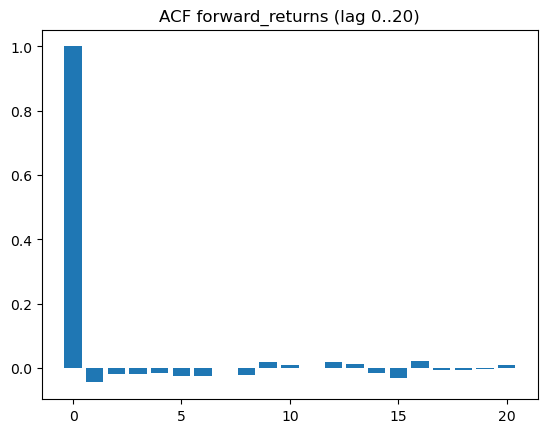

In [80]:
# forward_returns ACF plot
from statsmodels.tsa.stattools import acf
fr = train['forward_returns'].dropna().values
acf_vals = acf(fr, nlags=20, fft=False)
plt.bar(range(len(acf_vals)), acf_vals)
plt.title("ACF forward_returns (lag 0..20)")
plt.show()

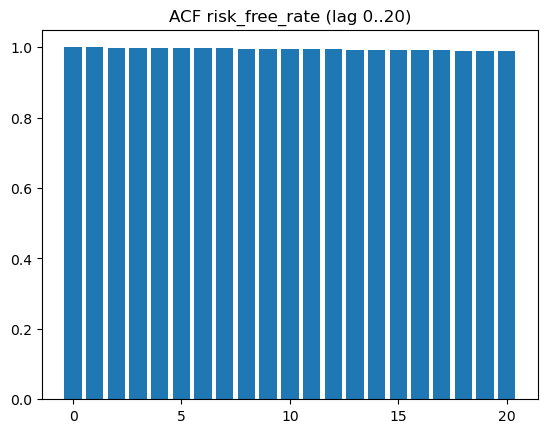

In [81]:
# risk_free_rate ACF plot
rfr = train['risk_free_rate'].dropna().values
acf_vals = acf(rfr, nlags=20, fft=False)
plt.bar(range(len(acf_vals)), acf_vals)
plt.title("ACF risk_free_rate (lag 0..20)")
plt.show()

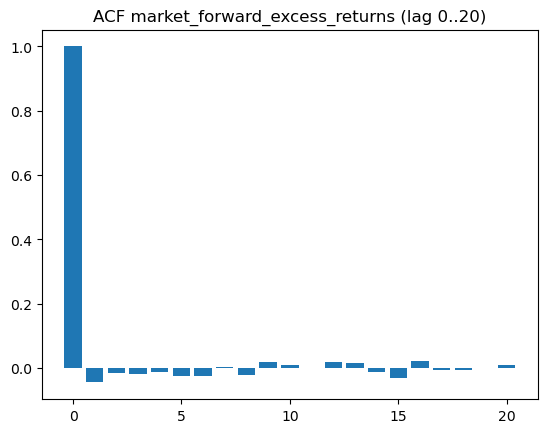

In [82]:
# market_forward_excess_returns ACF plot
mfer = train['market_forward_excess_returns'].dropna().values
acf_vals = acf(mfer, nlags=20, fft=False)
plt.bar(range(len(acf_vals)), acf_vals)
plt.title("ACF market_forward_excess_returns (lag 0..20)")
plt.show()

In [83]:
# Features and Targets
exclude = {'date_id','forward_returns','risk_free_rate','market_forward_excess_returns'}
features = [c for c in train.columns if c not in exclude]
print(f"Number of candidate features: {len(features)}")
print(f"Candidate features:")
print(features)
print(f"Number of candidate Targets: {len(exclude)}")
print('Targets:')
print(['forward_returns','risk_free_rate','market_forward_excess_returns'])

Number of candidate features: 87
Candidate features:
['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'e1', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e2', 'e20', 'e3', 'e4', 'e5', 'e6', 'e8', 'e9', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'm10', 'm11', 'm12', 'm15', 'm16', 'm17', 'm18', 'm2', 'm3', 'm4', 'm5', 'm7', 'm8', 'm9', 'p1', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 's1', 's10', 's11', 's12', 's2', 's4', 's5', 's6', 's7', 's8', 's9', 'v1', 'v11', 'v12', 'v13', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']
Number of candidate Targets: 4
Targets:
['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']


In [84]:
# Calculate Correlations with the Target Variable
correlations = train[features + ['forward_returns','risk_free_rate','market_forward_excess_returns']].corr()
corr_with_forward_returns = correlations['forward_returns'].drop(['forward_returns','risk_free_rate','market_forward_excess_returns'])
corr_with_risk_free_rate = correlations['risk_free_rate'].drop(['forward_returns','risk_free_rate','market_forward_excess_returns'])
corr_with_market_forward_excess_returns = correlations['market_forward_excess_returns'].drop(['forward_returns','risk_free_rate','market_forward_excess_returns'])

# display top 10 positive and negative correlations for each target
def display_top_correlations(corr_series, target_name):
    print(f"\nTop 10 positive correlations with {target_name}:")
    print(corr_series.sort_values(ascending=False).head(10))
    print(f"\nTop 10 negative correlations with {target_name}:")
    print(corr_series.sort_values(ascending=True).head(10))
display_top_correlations(corr_with_forward_returns, 'forward_returns')
display_top_correlations(corr_with_risk_free_rate, 'risk_free_rate')
display_top_correlations(corr_with_market_forward_excess_returns, 'market_forward_excess_returns')


Top 10 positive correlations with forward_returns:
v13    0.060394
s5     0.038868
d1     0.034180
d2     0.034180
v7     0.031311
m2     0.026984
d8     0.024739
e19    0.023786
m17    0.023147
s6     0.019630
Name: forward_returns, dtype: float64

Top 10 negative correlations with forward_returns:
m4    -0.064477
s2    -0.036258
e11   -0.029054
e12   -0.027960
m12   -0.022777
i2    -0.022339
p5    -0.021950
p12   -0.021673
p7    -0.020926
m8    -0.020291
Name: forward_returns, dtype: float64

Top 10 positive correlations with risk_free_rate:
i9     0.301622
i5     0.301147
i2     0.296175
e6     0.274761
e3     0.271088
p11    0.188699
e20    0.167998
p10    0.159478
e2     0.156248
p8     0.151371
Name: risk_free_rate, dtype: float64

Top 10 negative correlations with risk_free_rate:
v8    -0.665747
v1    -0.593305
v12   -0.541824
v11   -0.482336
s9    -0.454938
m16   -0.406681
s10   -0.403980
v6    -0.400220
s11   -0.389499
s4    -0.385232
Name: risk_free_rate, dtype: float64

Top

In [85]:
from pathlib import Path

# Try common locations for the submission file
candidates = [
    Path("submission.csv"),  # same folder as notebook
    Path("../02_Hull Tactical - Market Prediction/submission.csv"),  # relative sibling folder
    Path("..") / "02_Hull Tactical - Market Prediction" / "submission.csv",  # same as above
]

submission_path = None
for p in candidates:
    if p.exists():
        submission_path = p
        break

if submission_path is None:
    raise FileNotFoundError(
        "submission.csv not found. Checked these locations:\n" +
        "\n".join(str(p) for p in candidates) +
        "\nPlace your submission.csv in one of these paths or update the path variable."
    )

# Read submission (auto-detect CSV or parquet by suffix)
if submission_path.suffix.lower() in [".csv", ".txt"]:
    submission = pd.read_csv(submission_path)
elif submission_path.suffix.lower() in [".parquet", ".pq"]:
    submission = pd.read_parquet(submission_path)
else:
    # Try CSV first, fallback to parquet
    try:
        submission = pd.read_csv(submission_path)
    except Exception:
        submission = pd.read_parquet(submission_path)

submission.head()

,id,target
0,0,0.002697
1,1,-0.000467
2,2,0.004770
3,3,0.001697
4,4,0.011210


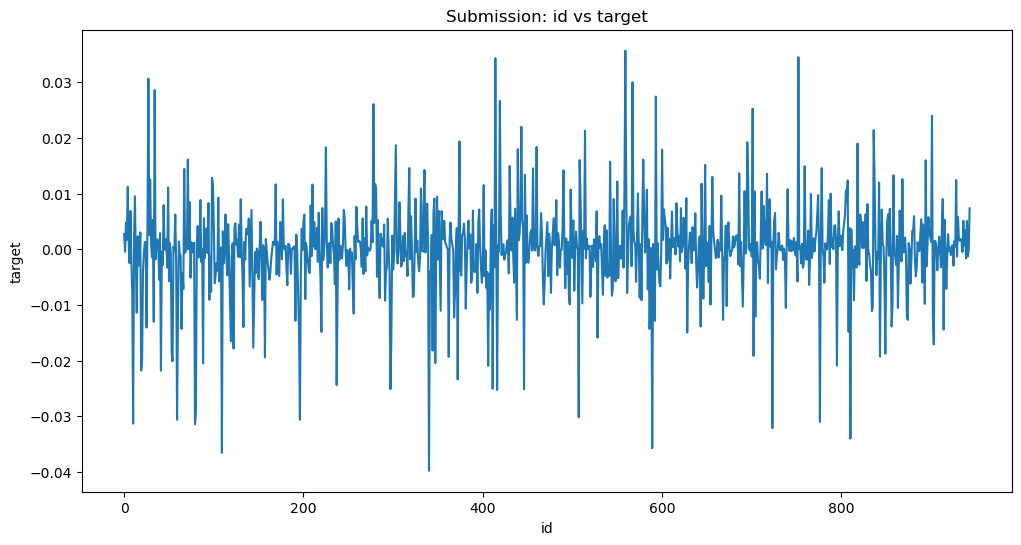

In [86]:
# plot id and target columns from submission file
plt.figure(figsize=(12,6))
plt.plot(submission['id'], submission['target'])
plt.xlabel('id')
plt.ylabel('target')
plt.title('Submission: id vs target')
plt.show()

In [87]:
# calculate simple returns
simple_returns = submission['target']

# Cumulative product of simple returns (correct for compounding)
cumprod_simple = (1 + simple_returns).cumprod() - 1

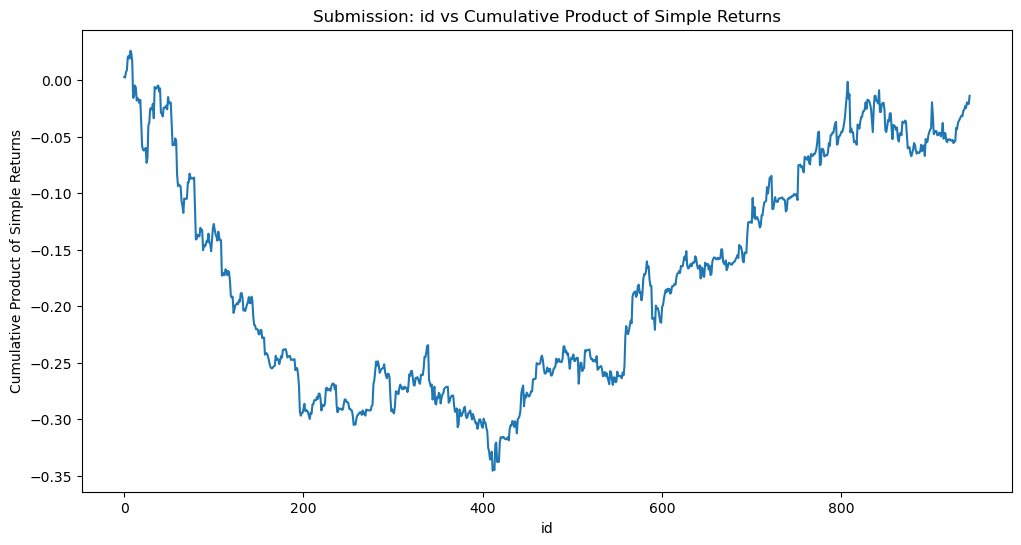

In [88]:
# plot cumprod_simple
plt.figure(figsize=(12,6))
plt.plot(submission['id'], cumprod_simple)
plt.xlabel('id')
plt.ylabel('Cumulative Product of Simple Returns')
plt.title('Submission: id vs Cumulative Product of Simple Returns')
plt.show()

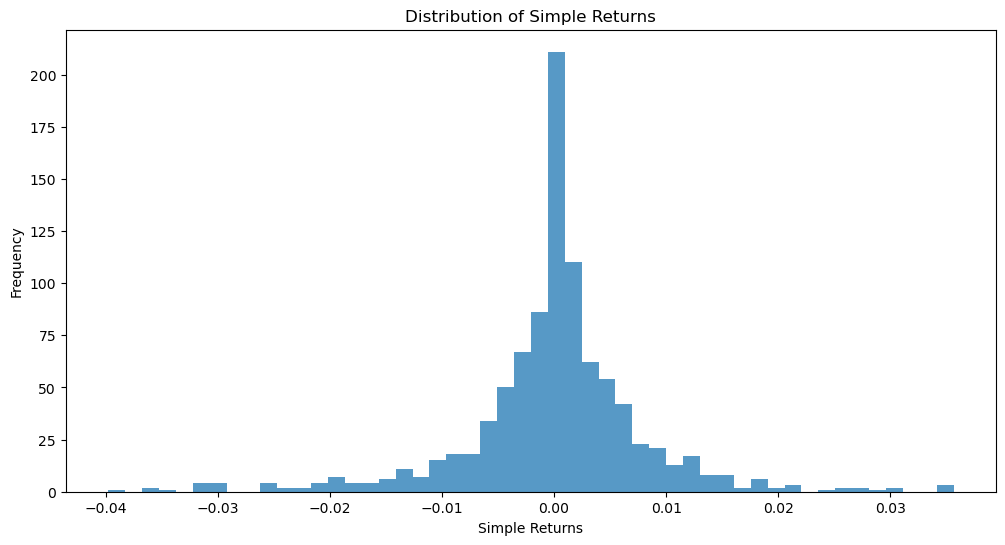

In [90]:
# plot distribution of target (simple returns)
plt.figure(figsize=(12,6))
plt.hist(simple_returns, bins=50, alpha=0.75)
plt.xlabel('Simple Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Simple Returns')
plt.show()